In [1]:
import sys

sys.path.insert(0, "..")
import networkx as nx
from shared.GraphConstructor import GraphConstructor

/home/raul/Documents/phd/quantinar-recommendation-engine/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h1> Quantinar PMFG </h1>

In [2]:
g = GraphConstructor(embeddings_file="../data/quantinar/quantinar_courselets.csv", separator=";", item_id_column="course_id", embedding_column="embedding", embeddings_separator=",")

G = g.construct_weighted_graph()
sorted_edges = g.sort_graph_edges(G)
nb_nodes = len(G.nodes)
PMFG = g.construct_pmfg(sorted_edges, nb_nodes)

nx.write_graphml(PMFG, "../assets/pmfg_graph_new.graphml", edge_id_from_attribute="courselet_id")

#GraphConstructor.nx_to_kg_file(PMFG, filename="../benchmarking/data/quantinar/quantinar.kg")
#g.write_quantinar_link("../benchmarking/data/quantinar/quantinar.link", id_column="course_id")
# g.plot_pmfg(G, save_fig="./cosine_similarity_graph_quantinar.png")
#g.plot_pmfg(PMFG, save_fig="./pmfg_quantinar.png")

Building graph edges...


Processing edges: 100%|██████████| 67896/67896 [00:00<00:00, 466299.33it/s]

Graph construction done. Total edges (above threshold): 25518



Processing edges: 100%|██████████| 25518/25518 [00:16<00:00, 1577.17it/s]


In [7]:
#g.plot_pmfg(G, save_fig=True)
T = nx.read_graphml("../assets/pmfg_graph.graphml")

NetworkXError: cannot tokenize <?xml version='1.0' encoding='utf-8'?> at (1, 1)

<h1>Diginetica PMFG</h1>

In [2]:
import networkx as nx

g = GraphConstructor(embeddings_file="../data/diginetica/products.csv", separator=";", item_id_column="itemId", embedding_column="product.name.tokens", embeddings_separator=",")

G = g.construct_weighted_graph()
sorted_edges = g.sort_graph_edges(G)
nb_nodes = len(G.nodes)
PMFG = g.construct_pmfg(sorted_edges, nb_nodes)

g.plot_pmfg(PMFG)

output_file = "diginetica_2000_pmfg.gml"
nx.write_gml(PMFG, output_file)

NameError: name 'GraphConstructor' is not defined

321
321


Processing edges: 100%|██████████| 377/377 [00:00<00:00, 11404.22it/s]

Computing layout for visualization...
Layout computation done.
Drawing PMFG graph...


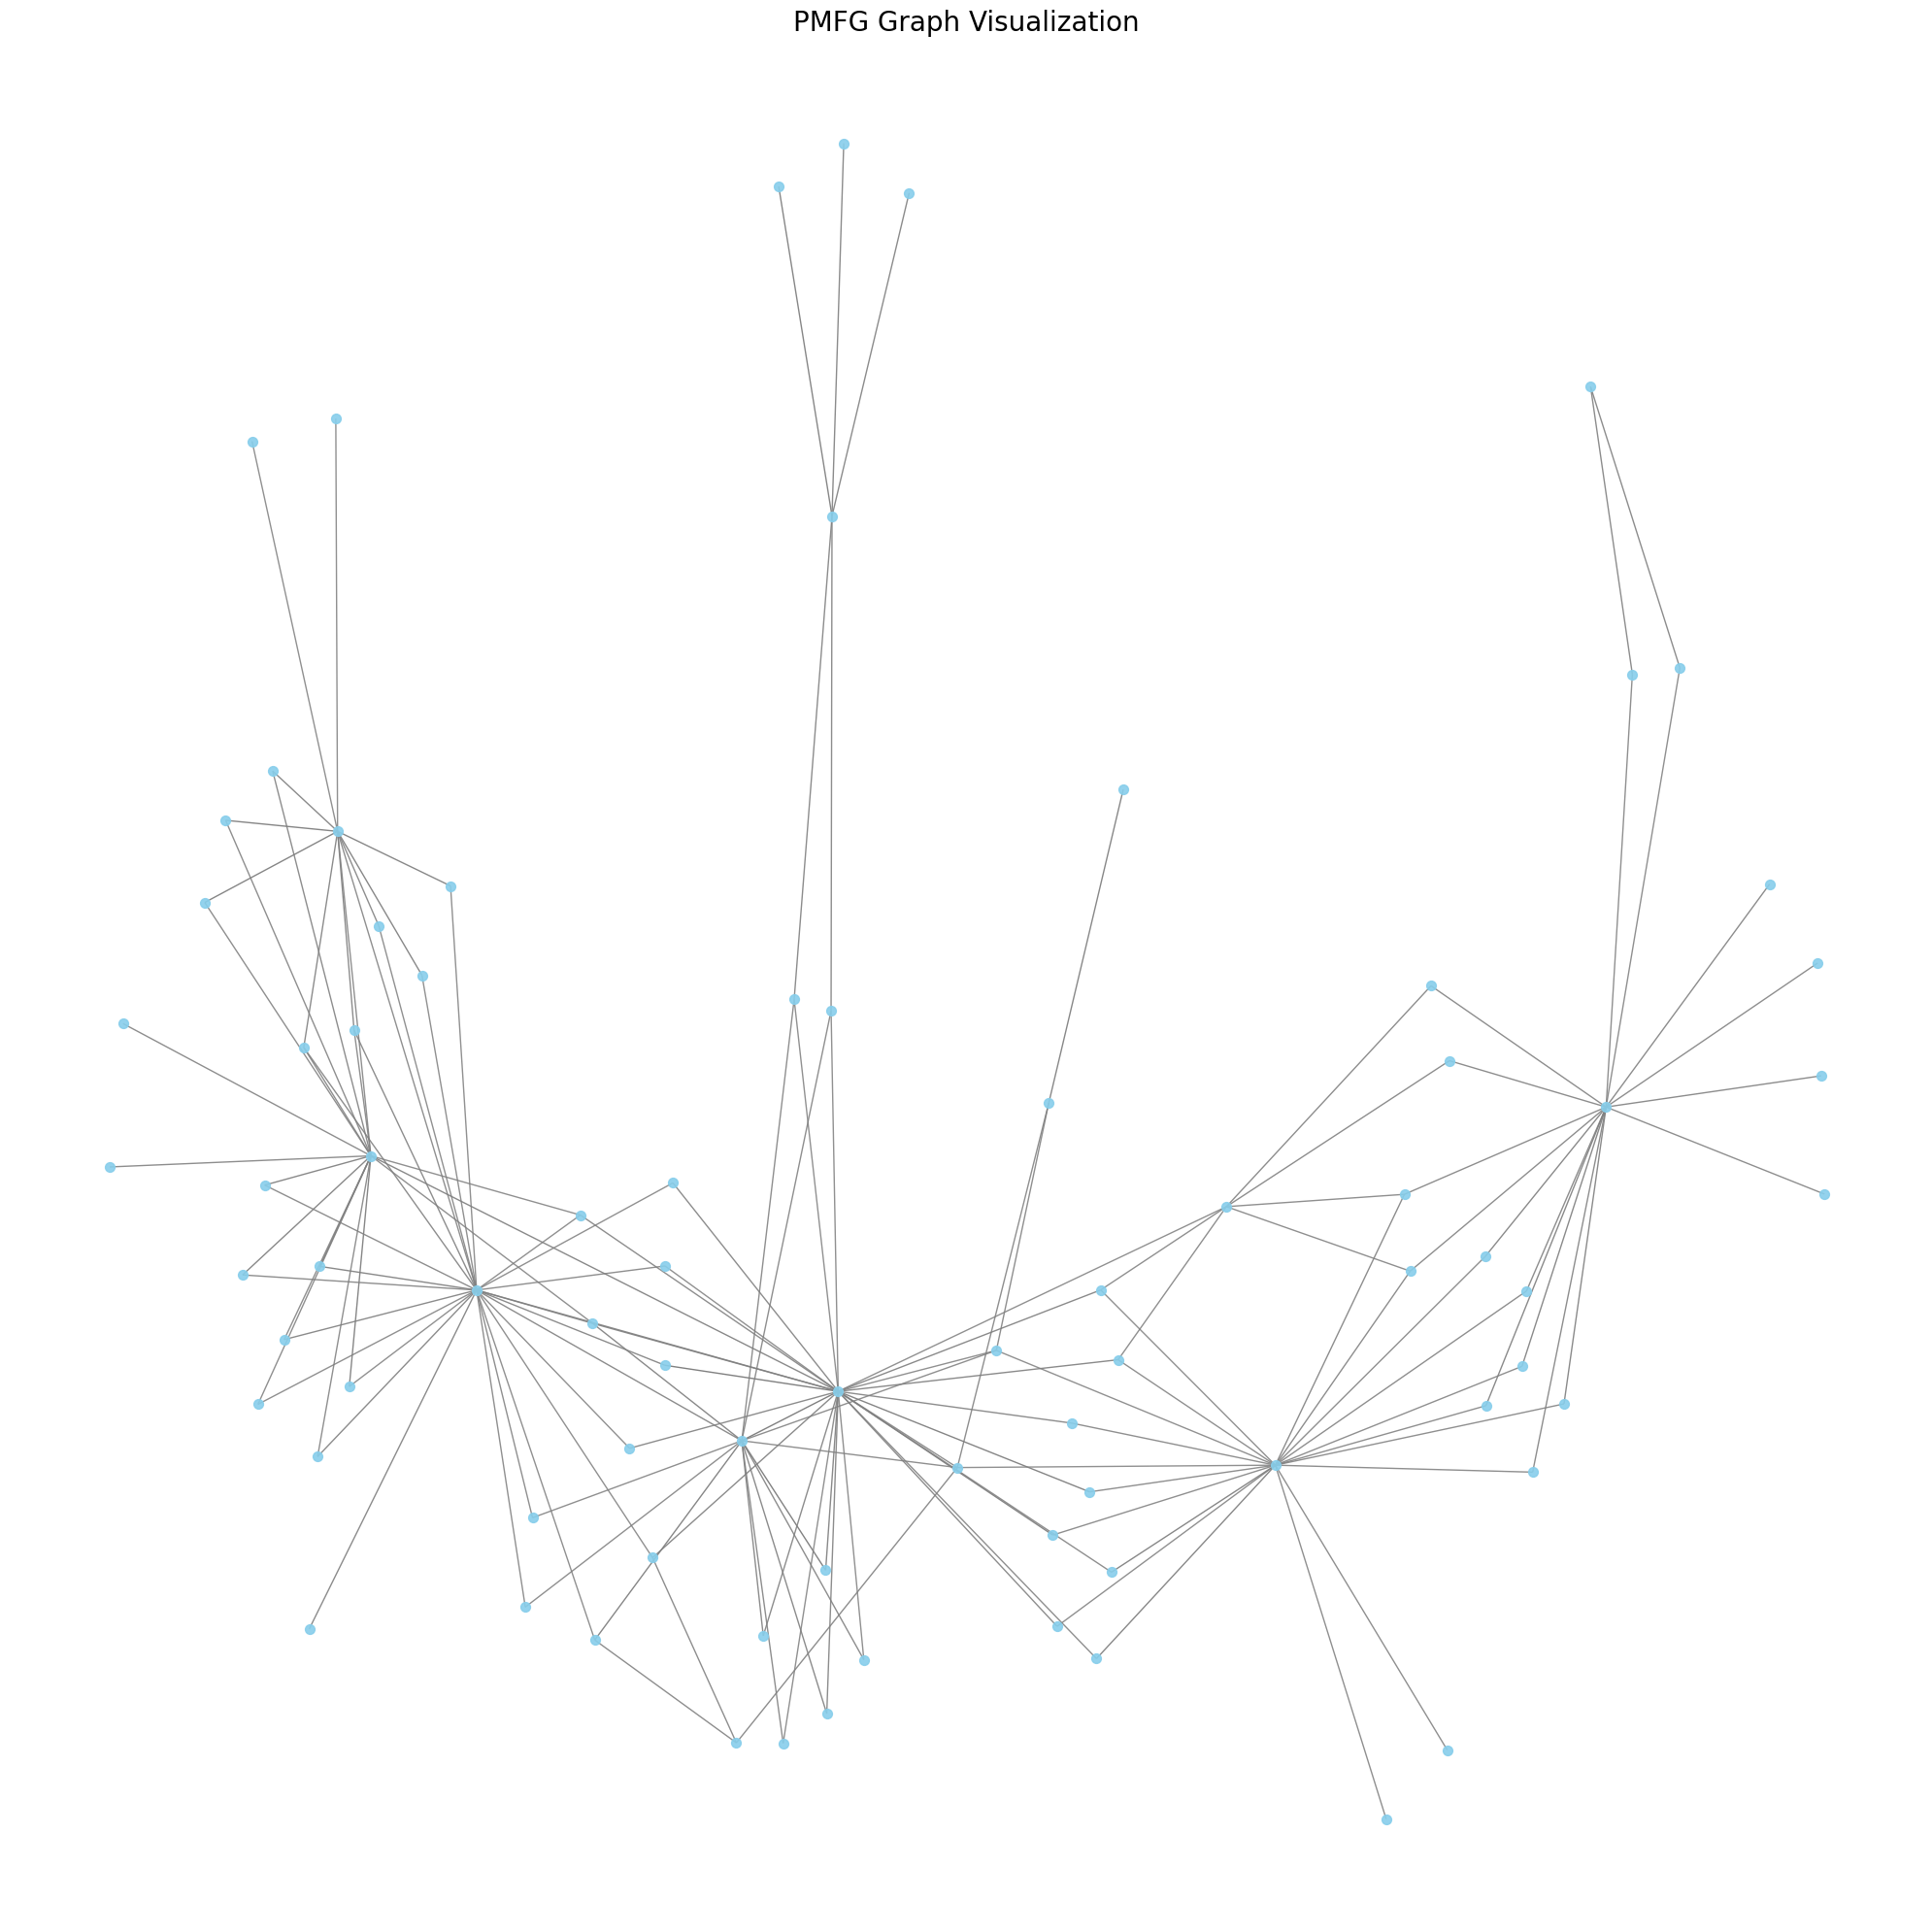

Visualization complete.


In [2]:
g = GraphConstructor(embeddings_file="../assets/embeddings.csv", separator=",", item_id_column="filename", embedding_column="embedding", embeddings_separator=" ")

G = g.load_graph_from_neo4j("bolt://localhost:7687", "neo4j", "12345678", "Courselet", "COSINE_SIMILARITY")
print(len(G.nodes))
#output_file = "diginetica_fully_weighted_graph.gml"
#nx.write_gml(G, output_file)

sorted_edges = g.sort_graph_edges(G)
nb_nodes = len(G.nodes)
print(nb_nodes)
PMFG = g.construct_pmfg(sorted_edges, nb_nodes)

g.plot_pmfg(PMFG)